# 数据实验

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

这里的数据给了两个时间段的，一个是15年1月到5月末的数据，一个是15年12月到16年1月末的数据，先研究前面的那个段

In [2]:
list_of_files = ['data_2015_1.txt','data_2015_2.txt','data_2015_3.txt','data_2015_4.txt','data_2015_5.txt']
lists_of_dataframe = [pd.read_table(list_of_files[i],header=None) for i in range(len(list_of_files))]

In [3]:
# 合并数据
df = pd.concat(lists_of_dataframe,axis=0,ignore_index=True)
print('一共有这么多条数据-->',df.shape[0])

一共有这么多条数据--> 1461


开始预处理

In [4]:
df.columns = ['uuid','flover_raw','time']
df['time'] = pd.to_datetime(df['time'])
df['flover'] = df['flover_raw'].apply(lambda x:int(x[x.find('r')+1:]))
df['date'] = df['time'].apply(lambda x:pd.datetime.date(x))

In [5]:
# 丢掉uuid 和 flover_raw，只保留['flover','time',date]
df = df[['flover','time','date']]

In [6]:
df.head(5)

,flover,time,date
0,15,2015-01-01 19:03:32,2015-01-01
1,15,2015-01-01 19:03:34,2015-01-01
2,8,2015-01-01 23:26:04,2015-01-01
3,2,2015-01-02 18:25:23,2015-01-02
4,8,2015-01-02 21:03:49,2015-01-02


In [7]:
flavors_unique = np.sort(np.array(df['flover'].unique(),dtype=np.int))
# flavors_unique 和 代码里面的含义一样
flavors_unique_counts = [np.count_nonzero(df['flover'] == i) for i in flavors_unique]
print(flavors_unique)
print(flavors_unique_counts)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 21 22 23]
[30, 92, 39, 18, 216, 99, 41, 363, 120, 20, 112, 67, 31, 139, 42, 14, 4, 2, 10, 2]


flover 购买的分布图


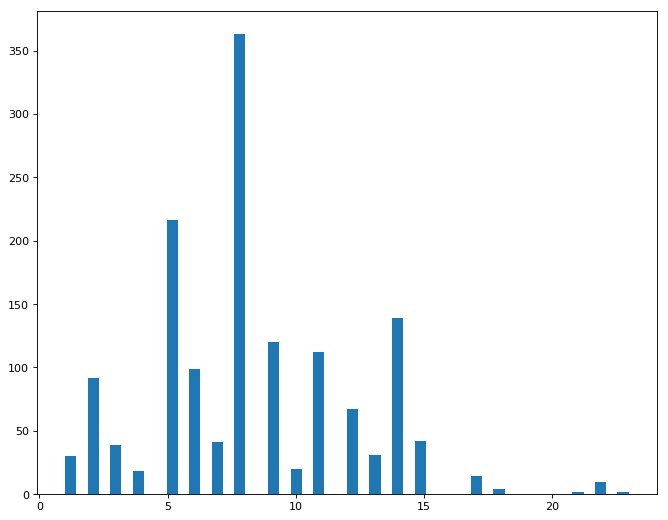

In [8]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
print('flover 购买的分布图')
plt.hist(df['flover'],50)
plt.show()

In [9]:
start_date = df.loc[0].date
end_date = df.loc[df.shape[0]-1].date
print('一共有这么多天的数据',(end_date - start_date).days)

一共有这么多天的数据 149


In [10]:
observation = pd.DataFrame(index=pd.date_range(start_date,end_date),columns=flavors_unique).fillna(0)

In [11]:
for i in flavors_unique:
    observation[i] = df[df['flover']==i][['flover','date']].groupby('date').count()
observation = observation.fillna(0)

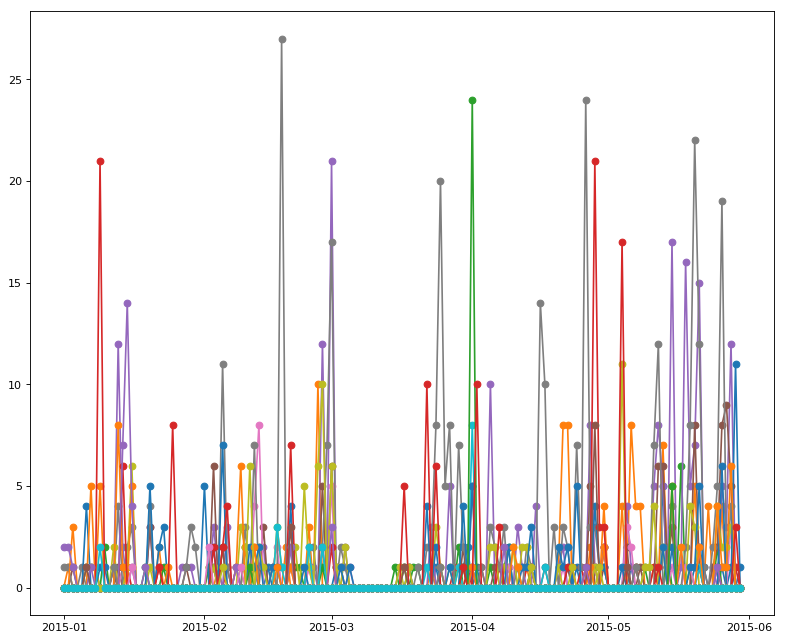

In [12]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(observation,marker='o')
plt.show()

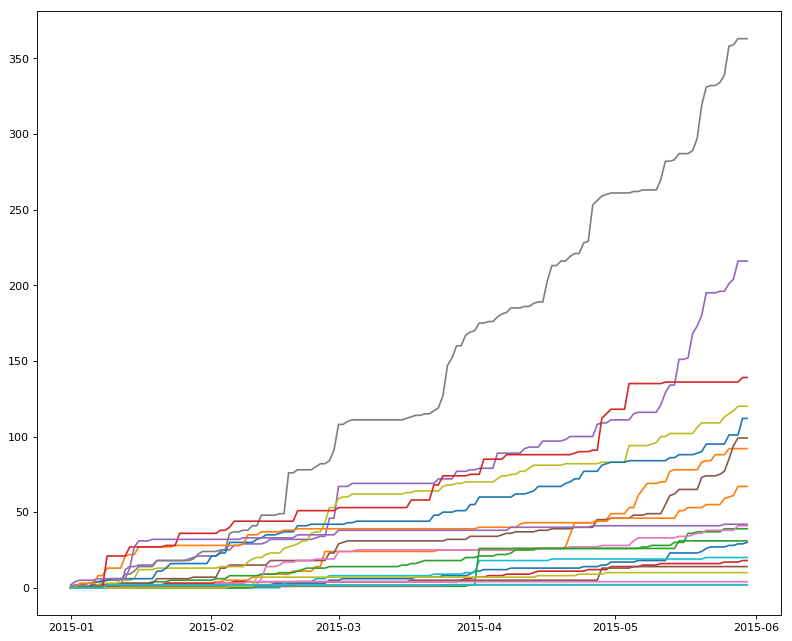

In [13]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.cumsum(observation))
plt.show()

In [14]:
print('上面图从大到小分别是')
np.argsort(flavors_unique_counts)[::-1]

上面图从大到小分别是


array([ 7,  4, 13,  8, 10,  5,  1, 11, 14,  6,  2, 12,  0,  9,  3, 15, 18,
       16, 17, 19], dtype=int64)

In [15]:
oo = observation.resample('W',how='sum')

C:\Users\taita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


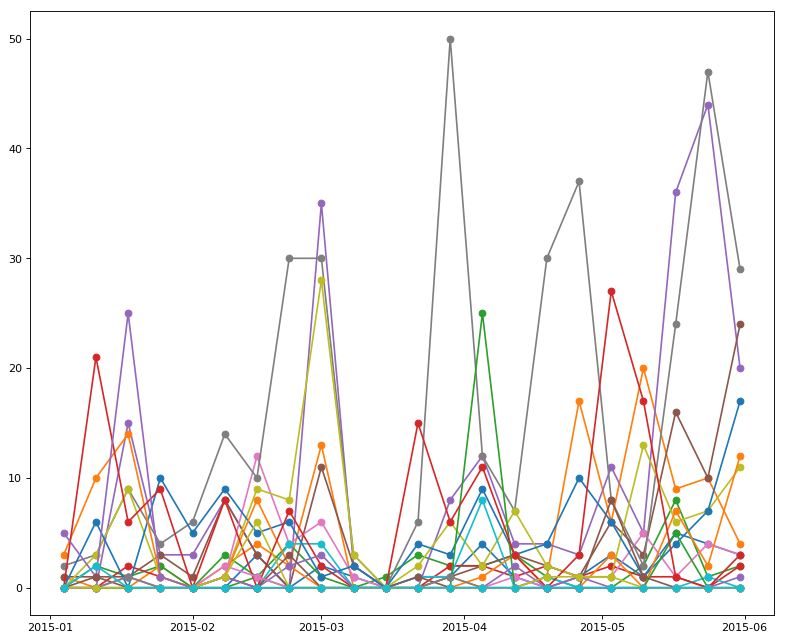

In [16]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(oo,marker='o')
plt.show()

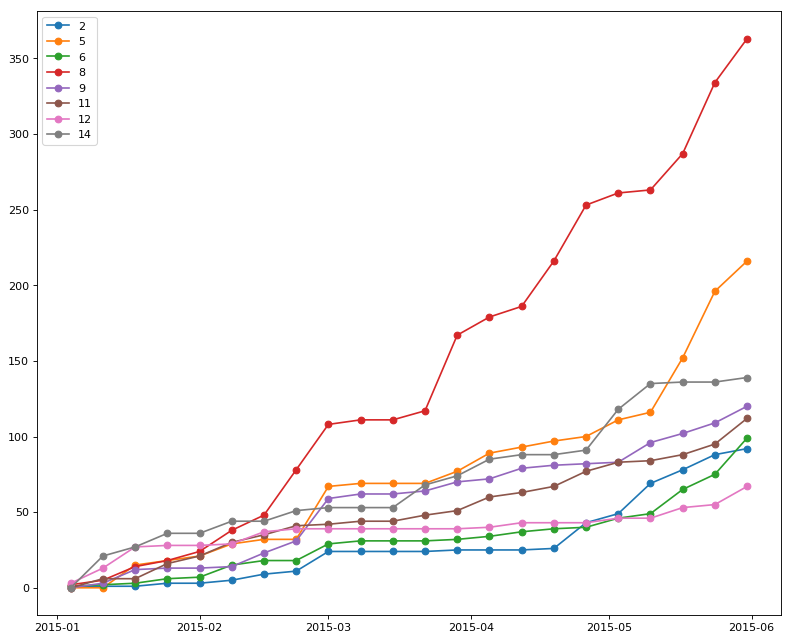

In [17]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
for i in [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 23]:
    if oo[[i]].sum().values[0]>50:
        plt.plot(np.cumsum(oo[[i]]),marker='o',label=i)
plt.legend()
plt.show()

In [18]:
flavers = {1:(1,1024),2:(1,2048),3:(1,4096),4:(2,2048),5:(2,4096),6:(2,8192),7:(4,4096),8:(4,8192),9:(4,16384),10:(8,8192),11:(8,16384),12:(8,32768),13:(16,16384),14:(16,32768),15:(16,65536)}

In [19]:
#  总量查看

In [20]:
_t = observation[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].copy()

In [21]:
#CPU
for i in range(1,15+1):
    _t[[i]] = _t[[i]]*flavers[i][0]

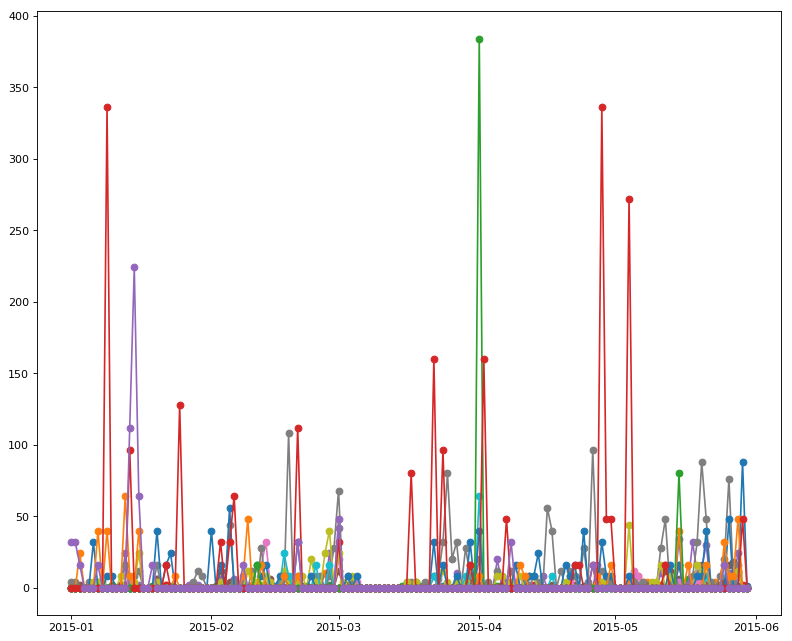

In [22]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(_t,marker='o')
plt.show()

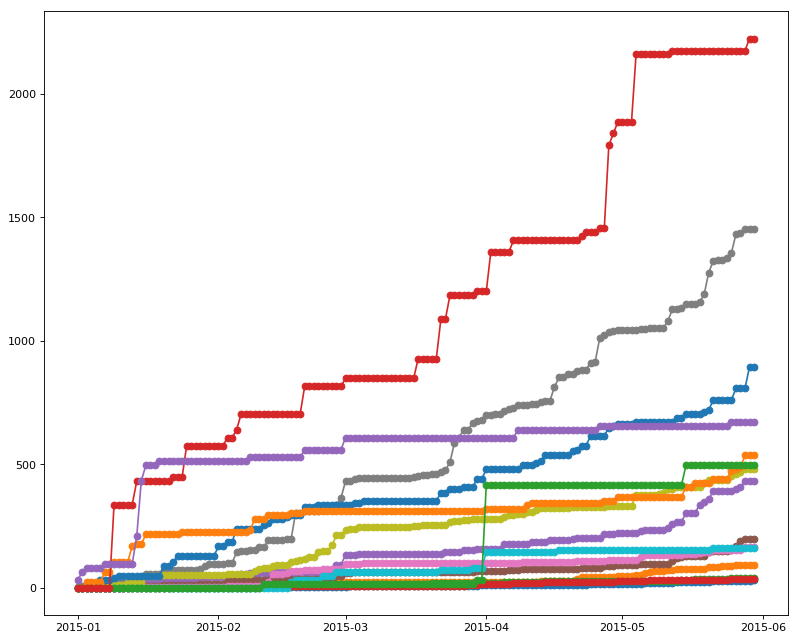

In [23]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.cumsum(_t),marker='o')
plt.show()

In [24]:
_t = _t.resample('W',how='sum')

C:\Users\taita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


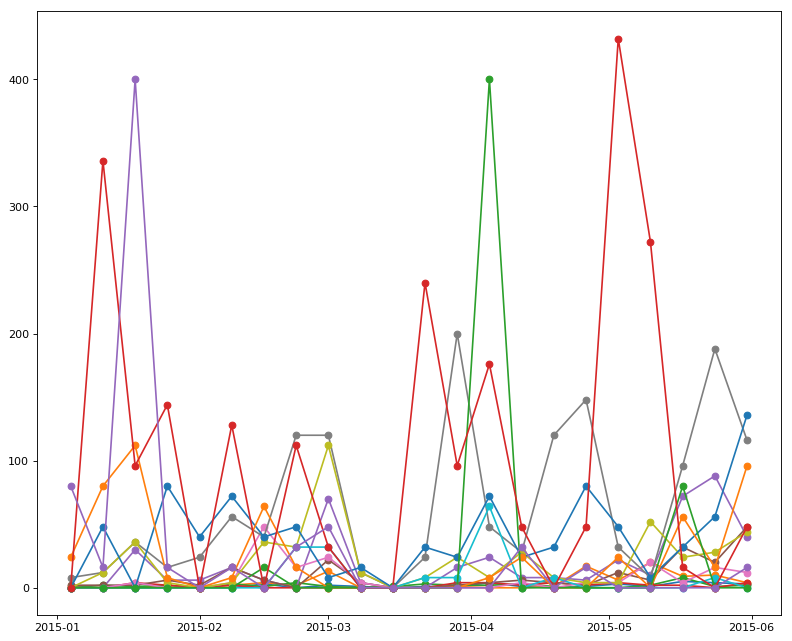

In [25]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(_t,marker='o')
plt.show()

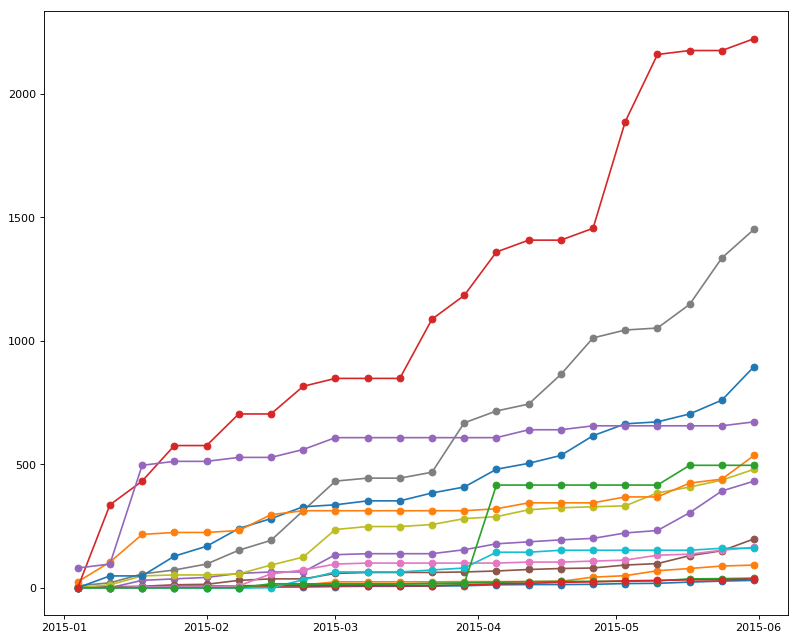

In [26]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.cumsum(_t),marker='o')
plt.show()

核总量与内存总量

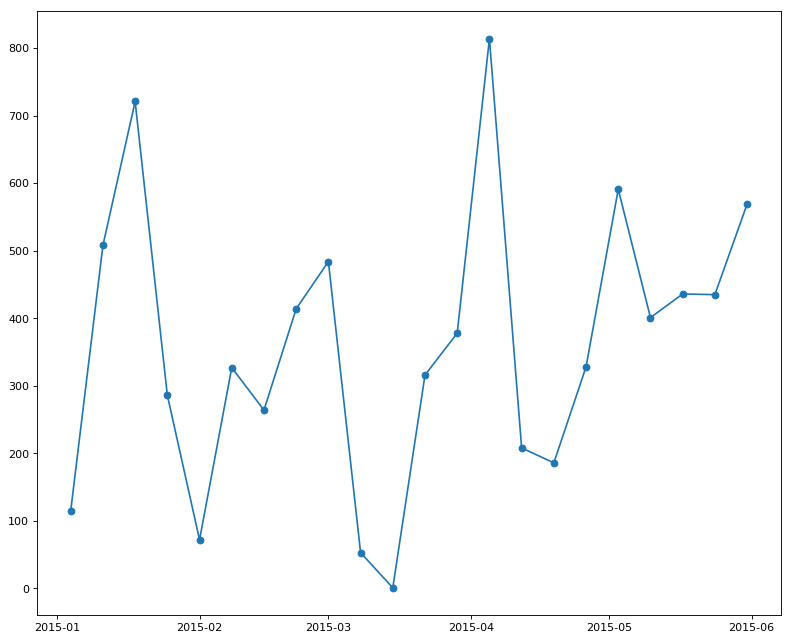

In [27]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(_t.sum(axis=1),marker='o')
plt.show()

C:\Users\taita\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  
C:\Users\taita\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


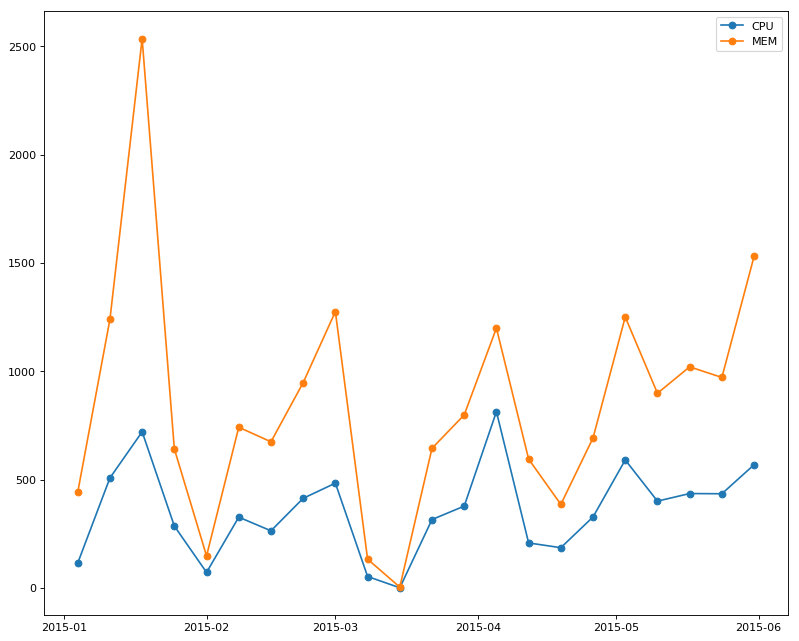

In [28]:
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
_t = observation[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].copy()
#CPU
for i in range(1,15+1):
    _t[[i]] = _t[[i]]*flavers[i][0]
_t = _t.resample('W',how='sum')
plt.plot(_t.sum(axis=1),marker='o',label='CPU')
# plt.show()

# plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
_t = observation[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].copy()
#MEM
for i in range(1,15+1):
    _t[[i]] = _t[[i]]*flavers[i][1]
_t = _t.resample('W',how='sum')
_t = _t/1024
plt.plot(_t.sum(axis=1),marker='o',label='MEM')
plt.legend()
plt.show()

# 训练及预测大体框架

In [29]:
from datetime import datetime
from datetime import timedelta

In [30]:
# 大概的样子
# def get_predict(observation,flavors_unique,trainning_days,testing_days):
#     trainning_days = [datetime.strptime(x,'%Y-%m-%d') for x in trainning_days]
#     testing_days = [datetime.strptime(x,'%Y-%m-%d') for x in testing_days]
#     predict = {}
#     for i in flavors_unique:
# #         predict[i] = 1
#     return predict

In [31]:
def _build_actual(observation,flavors_unique,testing_days):
    testing_days = [datetime.strptime(x,'%Y-%m-%d') for x in testing_days]
    actual = {}
    test_o = observation[(observation.index >= testing_days[0]) * (observation.index <= testing_days[1])]
    for i in flavors_unique:
        actual[i] =  test_o[i].sum()
    return actual

In [32]:
def evaluate(predict,actual):
    print(predict)
    print(actual)
    y = np.array(list(actual.values()))
    y_ = np.array(list(predict.values()))
    print('score-->',1-(np.mean((y-y_)**2)/(np.mean((y)**2)+np.mean((y_)**2))))
    pass

# 1.简单的一个样例 - MA法！
可以修改这里来实验新的方法，先定义get_predict 函数

In [33]:
def get_predict(observation,flavors_unique,trainning_days,testing_days):
    trainning_days = [datetime.strptime(x,'%Y-%m-%d') for x in trainning_days]
    testing_days = [datetime.strptime(x,'%Y-%m-%d') for x in testing_days]
    predict = {}

    testing_days_delta = timedelta(days=(testing_days[1] - testing_days[0]).days +1 )
    print(testing_days_delta)
    ma = 3
    train_o = observation[(observation.index > trainning_days[1]-testing_days_delta*3) * (observation.index <= trainning_days[1])]
    print(train_o.shape)
    for i in flavors_unique:
        predict[i] = train_o[i].sum()//ma
    return predict

In [34]:
trainning_days = ['2015-01-01','2015-05-23']
testing_days = ['2015-05-24','2015-05-30']

In [35]:
predict = get_predict(observation,flavors_unique,trainning_days,testing_days)

7 days, 0:00:00
(21, 20)


In [36]:
actual = _build_actual(observation,flavors_unique,testing_days)

In [37]:
evaluate(predict,actual)

{1: 3.0, 2: 13.0, 3: 3.0, 4: 0.0, 5: 28.0, 6: 9.0, 7: 3.0, 8: 23.0, 9: 8.0, 10: 0.0, 11: 4.0, 12: 3.0, 13: 1.0, 14: 6.0, 15: 0.0, 17: 0.0, 18: 0.0, 21: 0.0, 22: 0.0, 23: 0.0}
{1: 3.0, 2: 4.0, 3: 2.0, 4: 2.0, 5: 21.0, 6: 25.0, 7: 3.0, 8: 31.0, 9: 11.0, 10: 0.0, 11: 17.0, 12: 12.0, 13: 0.0, 14: 3.0, 15: 1.0, 17: 0.0, 18: 0.0, 21: 0.0, 22: 0.0, 23: 0.0}
score--> 0.833295010347


# 2.窗口滚动的循环预测

In [38]:
# todo

# 附录

In [39]:
observation

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,21,22,23
2015-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2015-01-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2015-01-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,2.0
2015-01-10,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
